# Project description

In this project I have used the [Breast Cancer Wisconsin (Diagnostic) Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) to predict breast cancer diagnosis based on features which are characteristics of a cell nuclei computed from an image of a fine needle aspirate of a breast mass.


Variable information:
The dataset contains 32 columns and some of the main variables are as follows

1. Radius: Mean of distances from center to points on the perimeter
2. Texture: Standard deviation of gray-scale values
3. Perimeter
4. Area
5. Smoothness: Local variation in radius lengths
6. Compactness: (Perimeter^2/area) - 1.0
7. Concavity: Severity of concave portions of the contour
8. Concave points: Number of concave portions of the contour
9. Symmetry
10. Fractal dimension: Coastline approximation - 1

To diagnose whether a cell is cancerous or not based on the features mentioned above I have used K Nearest Neighbours and Support Vector Machine models. I have used the models above as they work well on smaller datasets and easy to implement.  

# Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn import preprocessing
import warnings
import seaborn as sns
import matplotlib.pylab as plt

%matplotlib inline

# Exploratory Data Analysis

In [21]:
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 
                'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 
                'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 
                'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

data =  pd.read_csv('breast+cancer+wisconsin+diagnostic/wdbc.data', names = column_names, header = None, sep=",")
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
#checking if there are any null values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
#checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [27]:
#converting diagnosis to numeric
data['diagnosis'].replace(to_replace=['B', 'M'],
                        value=[0, 1], inplace=True)

C:\Users\lubab\AppData\Local\Temp\ipykernel_7124\3531945790.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['diagnosis'].replace(to_replace=['B', 'M'],
C:\Users\lubab\AppData\Local\Temp\ipykernel_7124\3531945790.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['diagnosis'].replace(t

In [29]:
# Looking at the first 5 rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Correlation Heatmap of all the columns where the correlation is greater than 0.5

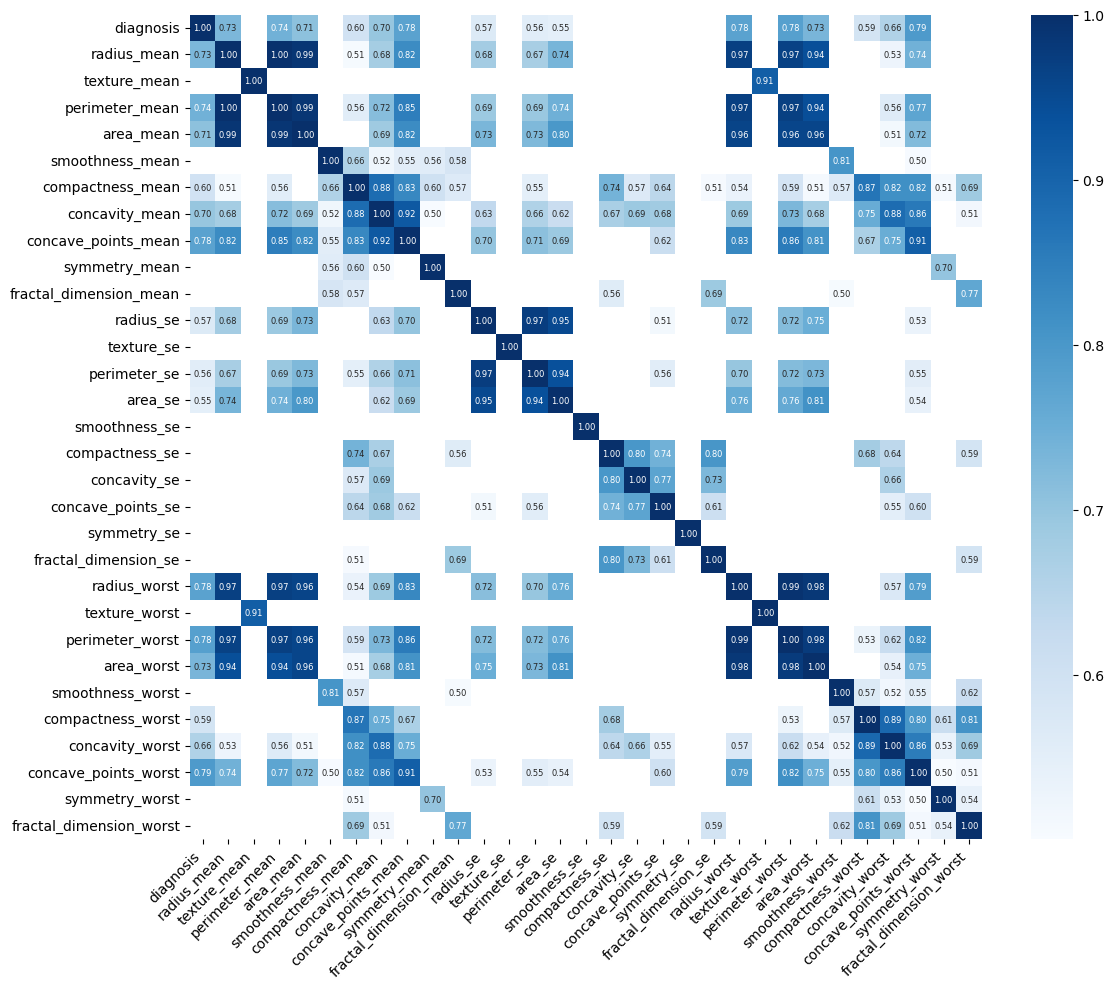

In [31]:
data = data.drop('id', axis=1)
correlation_matrix = data.corr()
mask = correlation_matrix < 0.5
plt.figure(figsize=(12, 10))  # Increase the figure size
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="Blues", mask = mask, annot_kws={"size": 6})  # Adjust font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### Correlation of diagnosis with all the features

In [33]:
df = data.drop('diagnosis', axis = 1)
df.corrwith(data['diagnosis'])

radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave_points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave_points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0.659610
concave_points_worst       0

It can be seen that 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst' have correlations greater than 0.5 with diagnosis so they are selected for fitting the models.

In [35]:
clean_data = data[['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'radius_se', 
                  'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst']]

# Fitting the KNN Model

In [37]:
#splitting the dataset into test and train
train, test = train_test_split(clean_data, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(455, 16)
(114, 16)


In [39]:
#training data variable declaration
x_train = train.drop(['diagnosis'], axis = 1)
y_train = train['diagnosis']

#testing data variable declaration
x_test = test.drop(['diagnosis'], axis = 1)
y_test = test['diagnosis']

In [41]:
#Fitting the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
#GridSearch is used to vary the value of k and see which value of k gives the best accuracy
#A range of k values from 1 to 100 are used
parms = {'n_neighbors':range(1,100)}

m = GridSearchCV(knn, parms)
m.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100)})

In [45]:
#Best K value is printed
print("The best K value is: ", m.best_params_)

The best K value is:  {'n_neighbors': 9}


In [47]:
#Accuracy with the best K value is printed
print("The accuracy with the best K value:", m.best_score_)

The accuracy with the best K value: 0.934065934065934


In [49]:
#10 fold cross validation
scores1 = cross_val_score(knn, x_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores1))

Cross-validation scores:[0.95652174 0.91304348 0.91304348 0.89130435 0.82608696 0.97777778
 0.86666667 0.91111111 0.93333333 0.95555556]


In [51]:
# compute Average cross-validation score
print('Average cross-validation score:', scores1.mean())

Average cross-validation score: 0.9144444444444444


It can be seen that the accuracy when the k value is 9 is around 93% and it can also be seen that 10 fold cross validation does not improve the accuarcy. 

# Fitting the SVM model

In [53]:
#centering and scaling data
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [55]:
#fitting the SVM classifier
clf_svm = SVC(random_state = 142)
clf_svm.fit(x_train_scaled, y_train)

SVC(random_state=142)

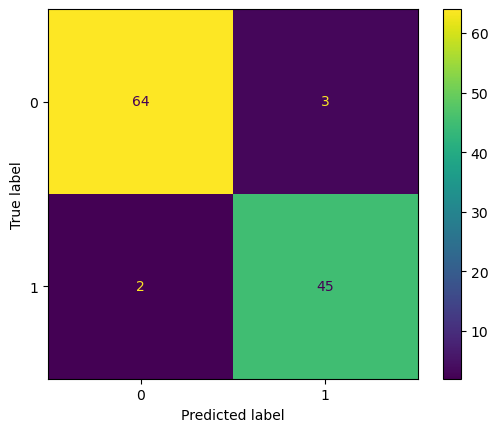

In [57]:
#Displaying the confusion matrix
predictions = clf_svm.predict(x_test_scaled)
cm = confusion_matrix(y_test, predictions, labels=clf_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_svm.classes_)
disp.plot()
plt.show()

In [59]:
#Classification accuracy
tp = cm[0,0] #true positives
tn = cm[1,1] #true negatives
fp = cm[0,1] #false positives
fn = cm[1,0] #false negatives

# print classification accuracy
accuracy = (tp + tn) / float(tp + tn + fp + fn)
print('Classification accuracy :', accuracy)

#classification error
error = (fp + fn) / float(tp + tn + fp + fn)
print('Classification error :', error)


Classification accuracy : 0.956140350877193
Classification error : 0.043859649122807015


It can be seen that the classification accuracy for the SVM model is around 95% which means that the SVM model performs better than the KNN model here. 